In [1]:
!pip install numpy
!pip install pandas

DEPRECATION: Loading egg at c:\users\hh364\anaconda3\lib\site-packages\fault_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\users\hh364\anaconda3\lib\site-packages\fault_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [26]:
import numpy as np
import pandas as pd

In [27]:
df=pd.read_csv("email_data.csv", encoding="ISO-8859-1")

In [28]:
df.sample(5)

,Category,Message
1088,ham,You can never do NOTHING
3323,ham,Ok darlin i supose it was ok i just worry too ...
278,ham,"Awesome, I'll see you in a bit"
4924,ham,Oh yah... We never cancel leh... Haha
2856,ham,Your gonna be the death if me. I'm gonna leave...


In [29]:
df.shape

(5572, 2)

In [ ]:
# 1) data cleaning
#2) EDA
# 3) text preprocesing
# 4) modle building
# 5) evaluation
# 6) improvements
# 7) website
# 8) depl0y

DATA CLEANING

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [31]:
#Renaming column
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [32]:
df.sample(5)

,target,text
4771,ham,CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...
4573,ham,Omg how did u know what I ate?
2427,spam,Valentines Day Special! Win over Â£1000 in our...
3590,ham,I've sent my wife your text. After we buy them...
1783,ham,My uncles in Atlanta. Wish you guys a great se...


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [34]:
df['target']=encoder.fit_transform(df['target'])

In [35]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
#check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
#check for duplicate values
df.duplicated().sum()

415

In [38]:
df=df.drop_duplicates(keep='first')

In [39]:
df.shape

(5157, 2)

In [40]:
####exploratory data analysis

In [41]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x263cc9a72c0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

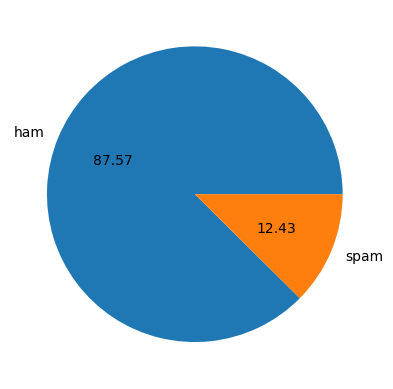

In [42]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

data is imbalanced

In [43]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\hh364\anaconda3\lib\site-packages\fault_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [44]:
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hh364\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
df.columns

Index(['target', 'text'], dtype='object')

In [47]:
df['num_characters']=df['text'].apply(len)

In [48]:
df['num_characters']=df['text'].apply(len)

In [49]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
#num of word
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [51]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [52]:
# num of setences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [54]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [55]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
######these are ham (non spam messages)
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
######these are  ( spam messages)
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

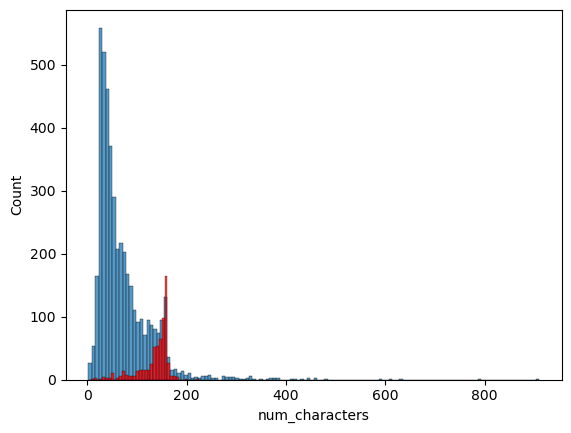

In [58]:
########spam messeges avg is larger than ham messeges
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


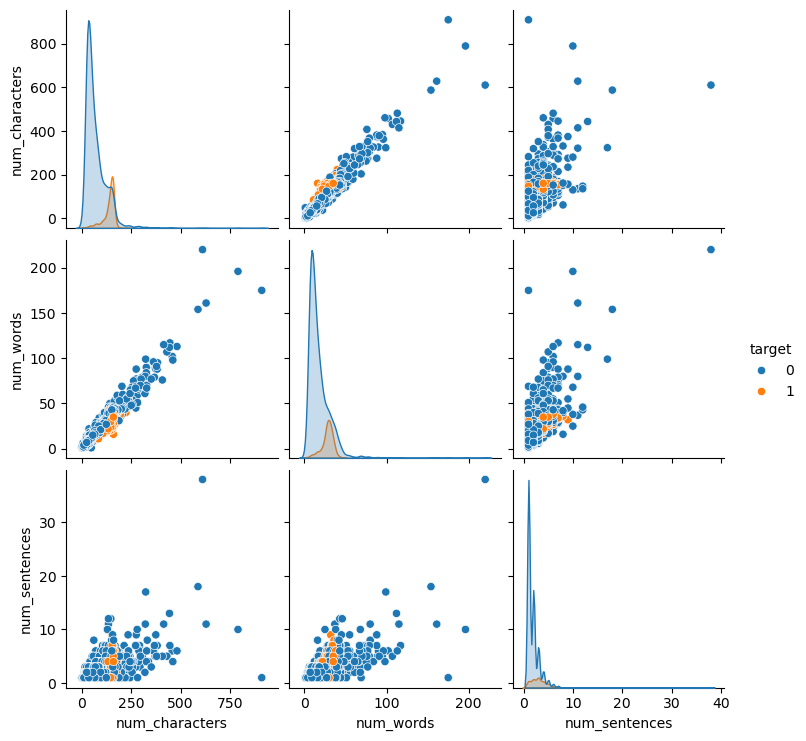

In [59]:
sns.pairplot(df,hue='target')

<Axes: >

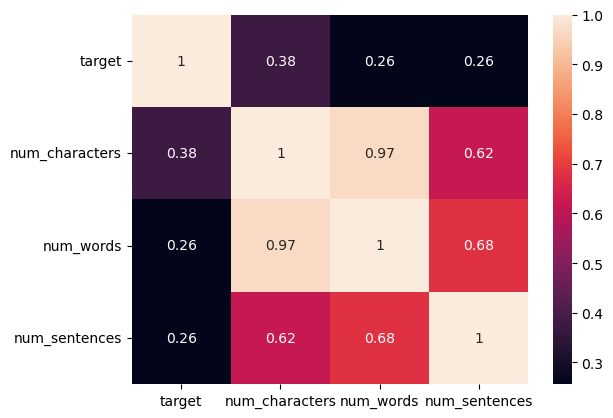

In [60]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

DATA PREPROCESSING
    lowercase
    tokenization
    removing special chaarachters
    removing step words and punctuation
    stemming

In [61]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hh364\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
import string

In [56]:
# stopwords.words('english')

In [64]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [58]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
 #df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [65]:
df['transformed_text']=df['text'].apply(transform_text)

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 544.7 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.5 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\hh364\anaconda3\lib\site-packages\fault_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [67]:

from wordcloud import WordCloud

In [68]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [69]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

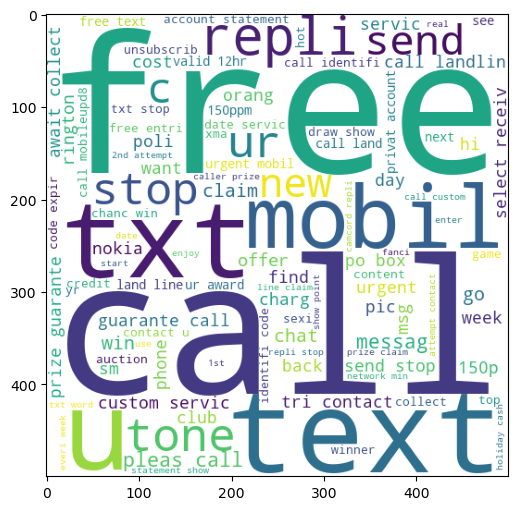

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [71]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

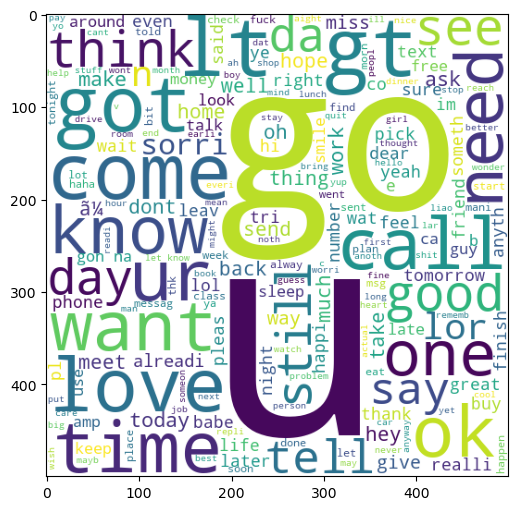

In [72]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [73]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [74]:
len(spam_corpus)

9774

In [76]:
!pip install seaborn as sns

DEPRECATION: Loading egg at c:\users\hh364\anaconda3\lib\site-packages\fault_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [75]:
import seaborn as sns

In [76]:
from collections import Counter

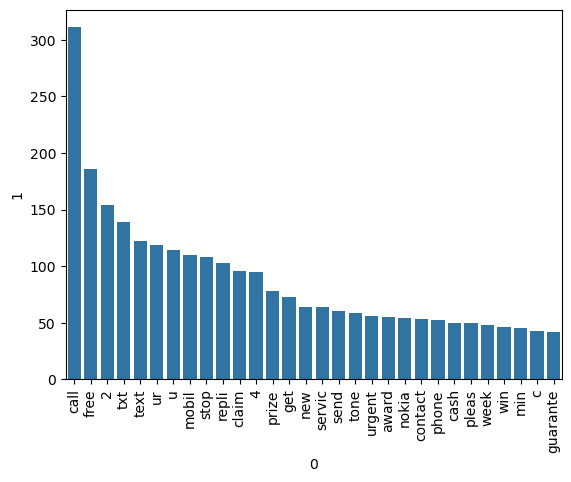

In [77]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [78]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#####text vectorization
######using bag of words

MODEL BUILDING

In [79]:
import sklearn

In [1]:
pip install --upgrade --force-reinstall scikit-learn




SyntaxError: invalid syntax (744562796.py, line 1)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Assuming 'df' is your DataFrame and 'transformed_text' is a column in it
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [7]:
!pip install tfidf

DEPRECATION: Loading egg at c:\users\hh364\anaconda3\lib\site-packages\fault_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [82]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [85]:
X.shape

(5157, 6777)

In [88]:
y=df['target'].values

In [89]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [95]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#very bad output obtained

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [97]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# still better

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [98]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# good

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [ ]:
# due to imbalance data we prefer accuracy 
# tfidf,mnb used

In [99]:
import pickle

In [100]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))